In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

sys.path.insert(0, "../")

import warnings
warnings.filterwarnings('ignore')

from michael import janet

2022-10-10 13:01:03.351058: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

In [3]:
index = 1

In [4]:
j = janet.boot(uni, index=index, use_prior=False)
j.prepare_data()

Already have data downloaded for Gaia ID 2174289161681454720.
If you want to check for new data, run `janet.update()`.
Removing 186 bad data points (out of 1121) using the TESS provided QUALITY array
Summing over 2 x 2 pixel lightcurves. Weighting=median
Removing 4 bad data points (out of 1130) using the TESS provided QUALITY array
Summing over 2 x 2 pixel lightcurves. Weighting=median


Running pixels in aperture: 100%|████████████| 300/300 [00:01<00:00, 294.57it/s]


In [5]:
j.get_rotation(period_range=(1, 10))

### Running Simple Astropy Lomb-Scargle on Sector 16-17 on star 2174289161681454720 ###
### Completed Simple Astropy Lomb-Scargle for Sector 16-17 on star 2174289161681454720 ###
### Running Wavelet Estimation for Sector 16-17 on star 2174289161681454720 ###


100%|█████████████████████████████████████████| 152/152 [00:02<00:00, 63.51it/s]


### Completed Wavelet Estimation for Sector 16-17 on star 2174289161681454720 ###
### Running Composite ACF estimation for Sector 16-17 on star 2174289161681454720 ###
### Completed Composite ACF estimation for Sector 16-17 on star 2174289161681454720 ###
### Running ACF Estimation on star 2174289161681454720 ###
### Completed ACF Estimation for Sector 16-17 on star 2174289161681454720 ###


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


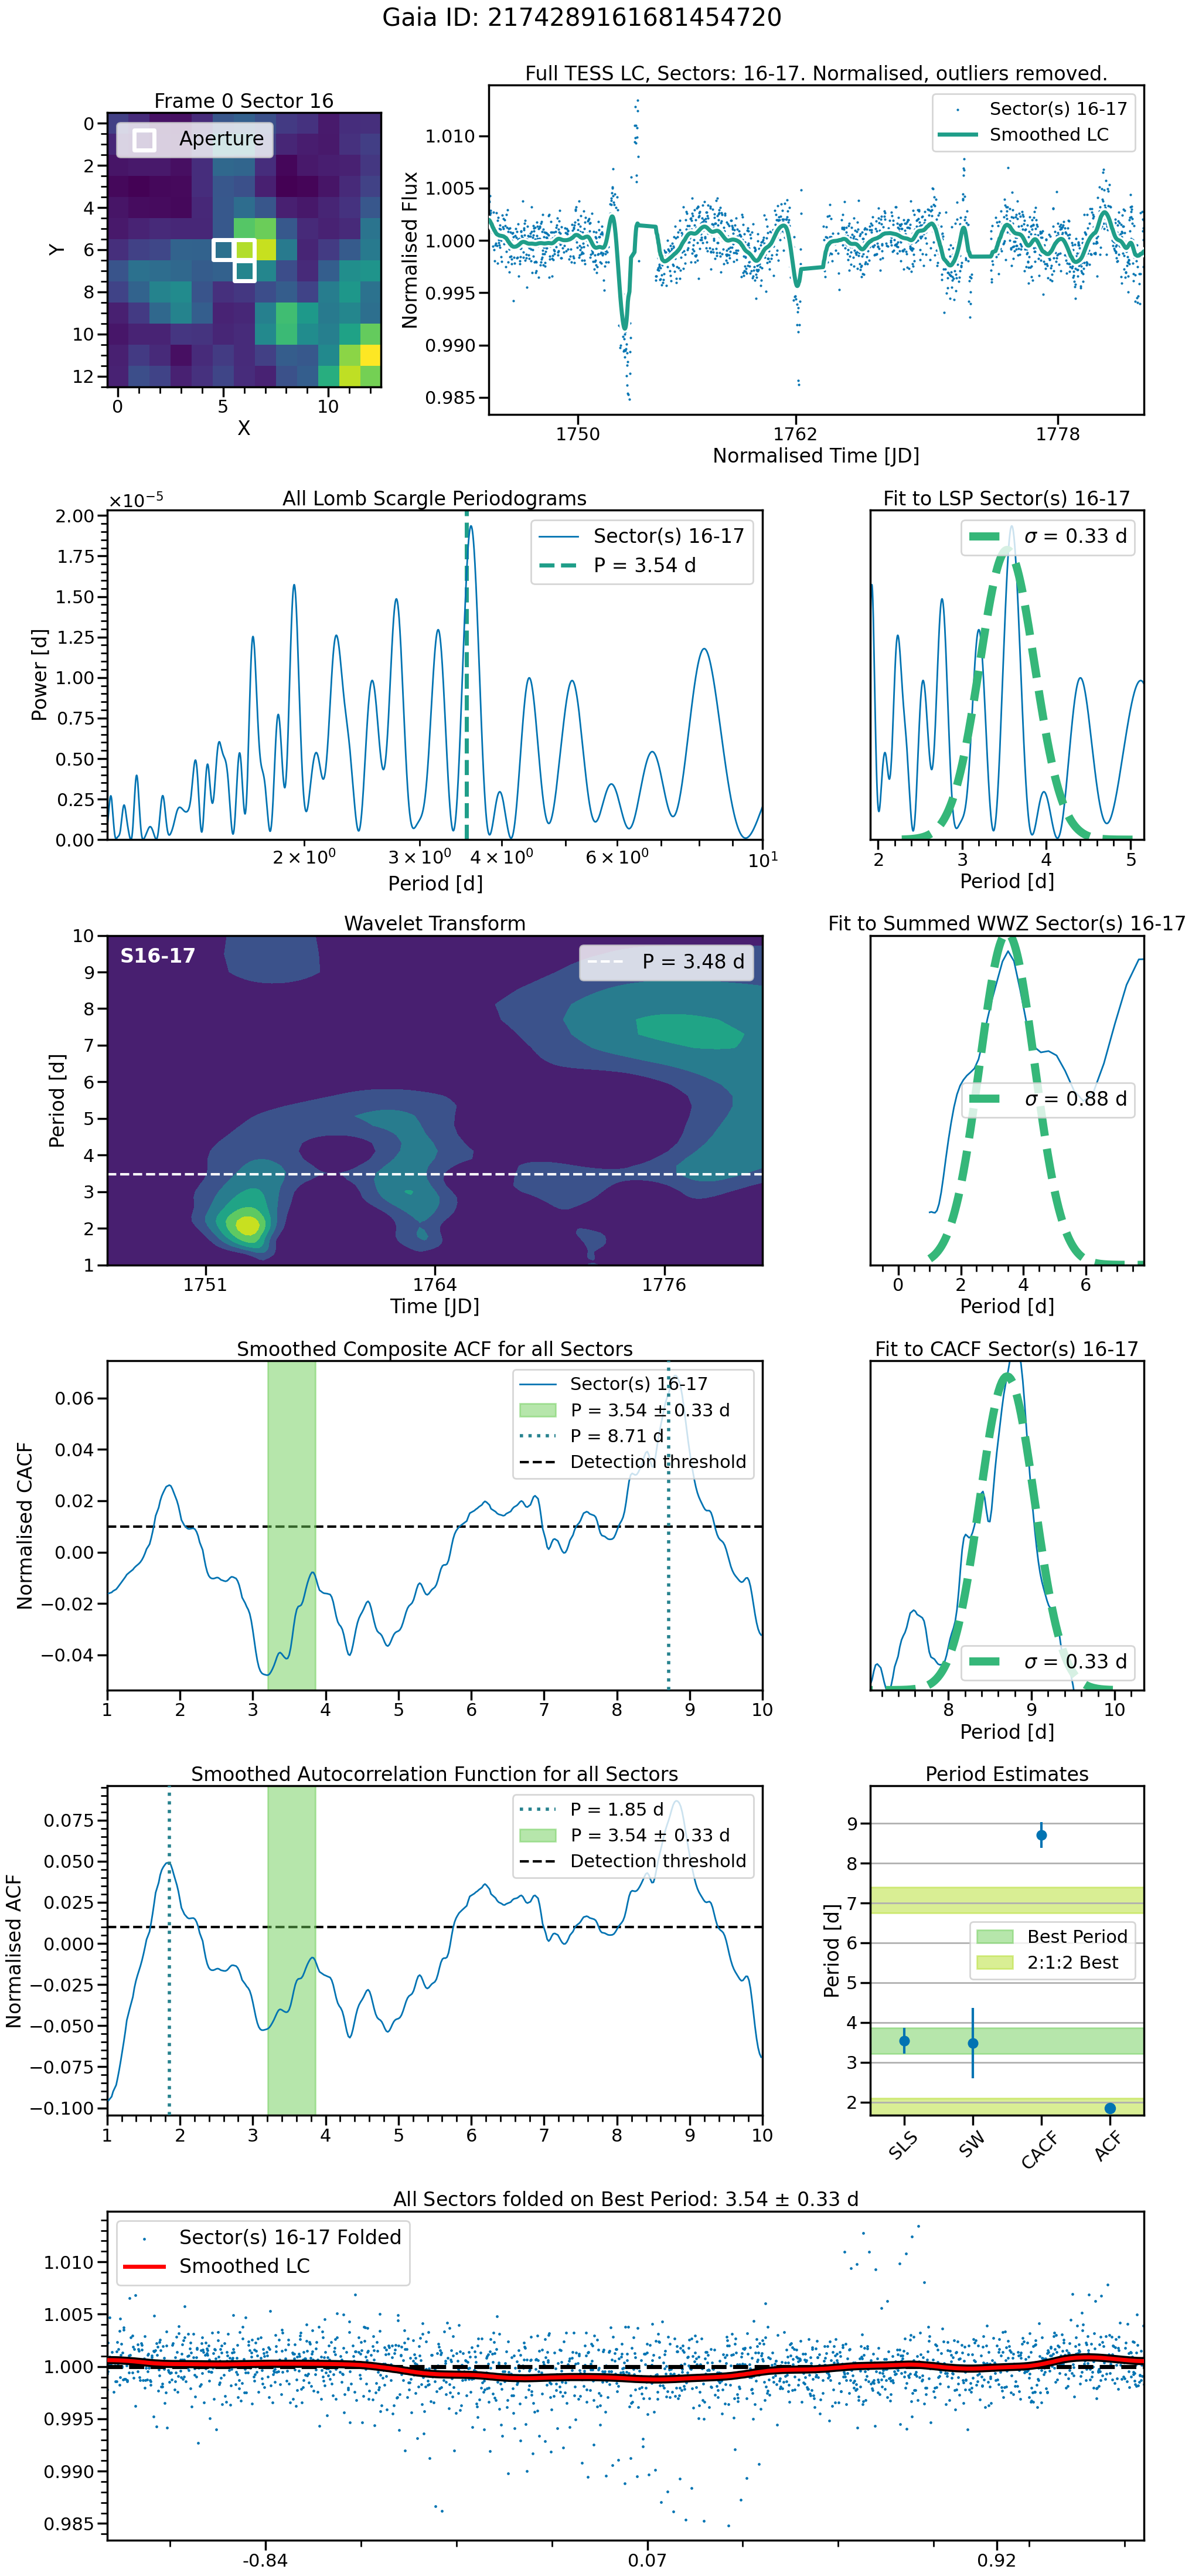

In [6]:
j.validate_rotation()
j.view()

In [9]:
j.results

,SLS,e_SLS,h_SLS,f_SLS,SW,e_SW,h_SW,CACF,e_CACF,h_CACF,...,p2p_ACF,f_p2p_ACF,s_SLS,s_SW,s_CACF,s_ACF,f_overall,overall,e_overall,method_overall
16-17,3.535797,0.325392,0.000018,0.0,3.480956,0.877798,1.057789,8.707782,0.329676,0.061869,...,0.001345,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
best,3.535797,0.325392,0.000018,0.0,3.480956,0.877798,1.057789,8.707782,0.329676,0.061869,...,0.001345,NaN,16-17,16-17,16-17,16-17,4,3.535797,0.325392,SLS


Plot lightcurves

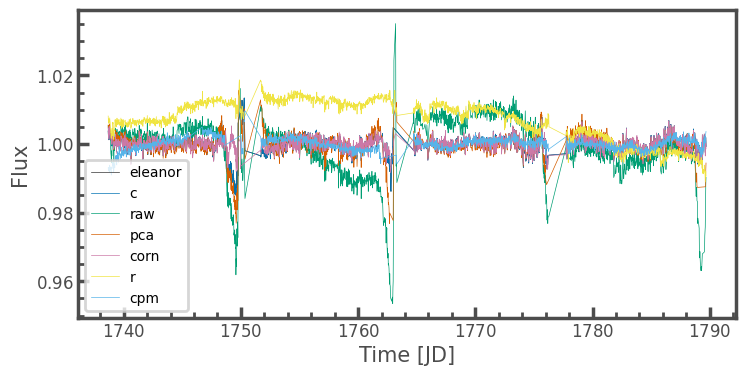

In [7]:
ax = j.void['clc_16-17'].plot(label='eleanor')

pls = ['c','raw','pca','corn','r', 'cpm']
for pl in pls:
    j.void[f'{pl}lc_16-17'].plot(ax=ax, label=pl)
ax.legend(fontsize=10)

3.569171113634658 d
27.0 d
6.632890260243894 d
8.109475186700477 d
22.281516117359086 d
22.281516117359086 d


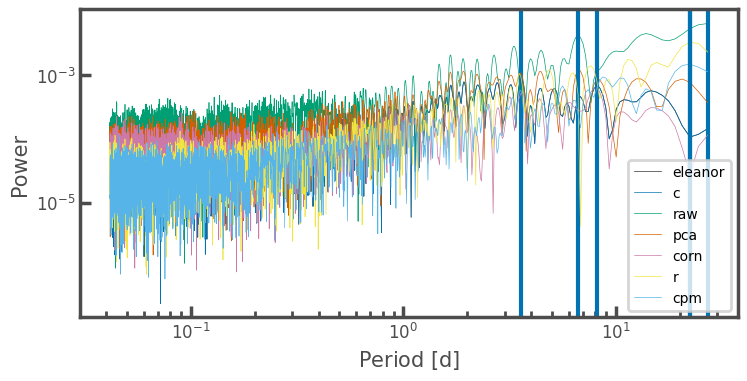

In [8]:
ax = j.void['clc_16-17'].to_periodogram(maximum_period=27).plot(label='eleanor', view='period')

pls = ['c','raw','pca','corn','r', 'cpm']
for pl in pls:
    j.void[f'{pl}lc_16-17'].to_periodogram(maximum_period=27).plot(ax=ax, label=pl,view='period', scale='log')
    ax.axvline(j.void[f'{pl}lc_16-17'].to_periodogram(maximum_period=27).period_at_max_power.value)
    print(j.void[f'{pl}lc_16-17'].to_periodogram(maximum_period=27).period_at_max_power)
ax.legend(fontsize=10)